<a href="https://colab.research.google.com/github/lauquintero28/Business-Analitics/blob/main/Reto3_M%C3%A9todosClustering_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo KNN - Key Nearest Neighbor**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**0. Cargar las librerías.**

In [ ]:
import numpy as np               #Funciones matemáticas
import pandas as pd              #Conexión con Archivos de Excel
import matplotlib.pyplot as plt  #Gráficas
import seaborn as sns            #Para graficar Distribuciones Estadísticas

#Se trae el modelo
from sklearn.neighbors import KNeighborsClassifier   #KNN - Que tan cercano estoy a un grupo de personas
from sklearn.metrics import confusion_matrix         #Matriz de Confusión
from sklearn.cluster import KMeans                   #Agrupamiento - Clustering

##**1. Cargar la base de datos del drive.**

<Figure size 1000x1000 with 0 Axes>

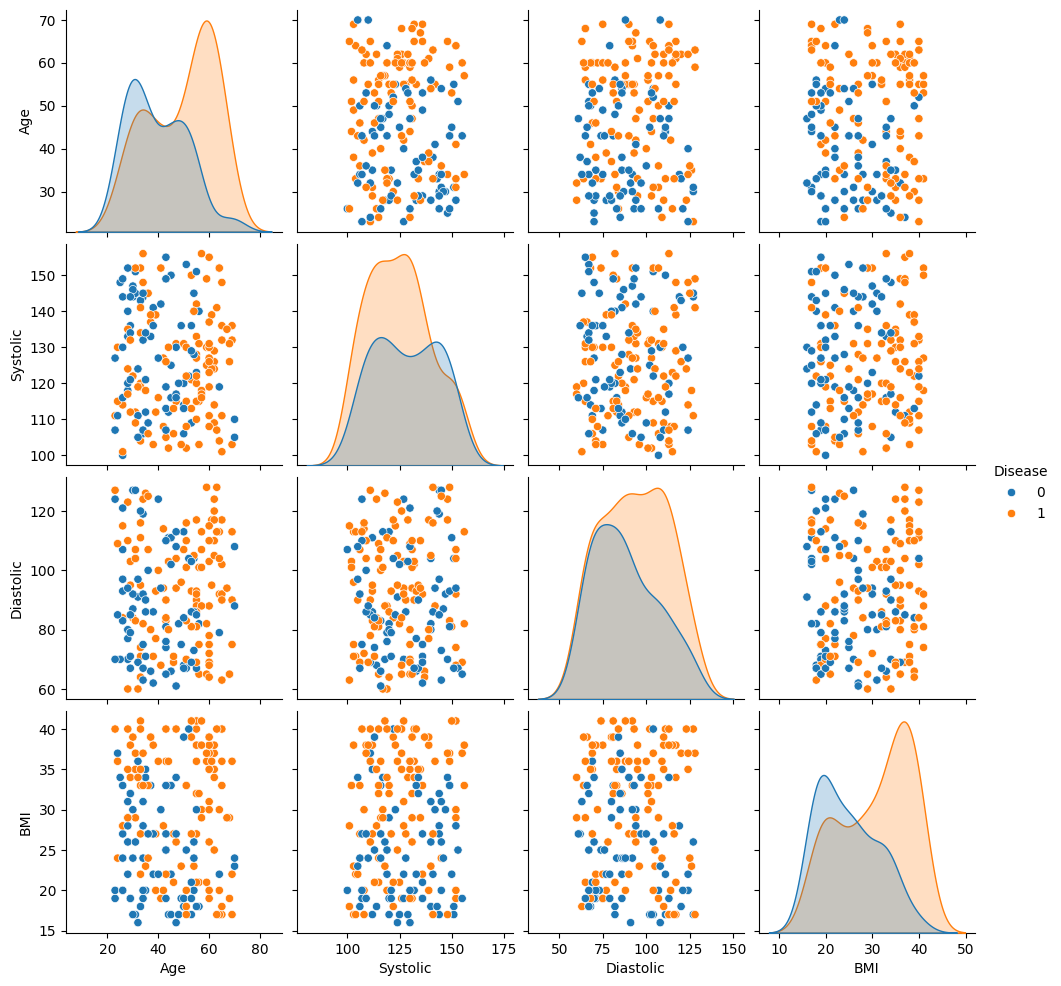

,Age,Systolic,Diastolic,BMI,Disease
Age,1.000000,-0.047693,-0.001494,-0.005604,0.356533
Systolic,-0.047693,1.000000,-0.008109,0.011938,-0.111110
Diastolic,-0.001494,-0.008109,1.000000,0.003735,0.142679
BMI,-0.005604,0.011938,0.003735,1.000000,0.382232
Disease,0.356533,-0.111110,0.142679,0.382232,1.000000


In [ ]:
nxl='/content/drive/MyDrive/EAFIT/TERCER SEMESTRE/Analítica de Negocios/3. BD2-HeartData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.dropna()                             #Evitar celdas vacias Not at Number
XDB.head(5)

#1. Seleccionamos las variables de interés
XDB=XDB[['Age','Systolic','Diastolic','BMI','Disease']] #Variables Entrada

#2. Determinamos la correlación entre las variables y su impacto sobre la variable de salida.
plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue='Disease')
plt.show()

#3. La correlación numérica es
XDB.corr()

####La variable que muestra la mayor correlación con la variable de **Disease** es **BMI** (Índice de Masa Corporal), con una correlación de **0.38**. Esto nos indica que el **BMI** tiene la relación más significativa con la probabilidad de desarrollar la enfermedad, comparado con las otras variables en el conjunto de datos.

##**2. Se procede con la implementación del modelo KNN.**

La matriz de confusión es:
: [[55 18]
 [29 78]]
Exactitud: 0.7388888888888889
Sensibilidad: 0.7289719626168224
Especificidad: 0.7534246575342466
Precision: 0.8125
La predicción es: [0]


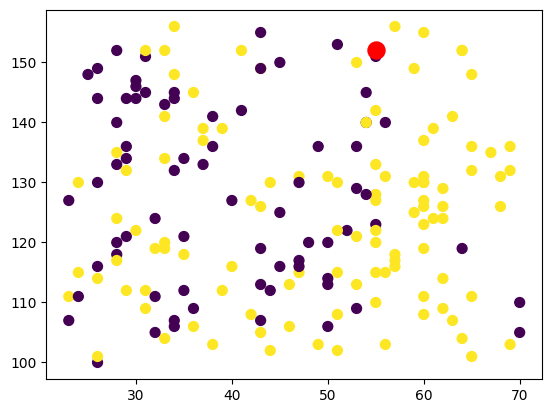

In [ ]:
#1. Construimos el modelo KNN
XD=np.array(XDB[['Age','Systolic','Diastolic','BMI']])  #Variables de entrada
yd=np.array(XDB['Disease'])                             #Variable de salida

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(XD,yd)                                          #Evaluamos frente a 10 vecinos

ydp=knn.predict(XD)

#2. Evaluamos el modelo KNN
cm=confusion_matrix(yd,ydp)
print('La matriz de confusión es:\n:',cm)
VN=cm[0,0];FP=cm[0,1]
FN=cm[1,0];VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)

print('Exactitud:',Exactitud)
print('Sensibilidad:',Sensibilidad)
print('Especificidad:',Especificidad)
print('Precision:',Precision)

#3. Evaluamos un paciente o pacienta
XDp=np.array([[55,152,92,22]])
ydpp=knn.predict(XDp)
print('La predicción es:',ydpp)

#Donde se encuentra el paciente
plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDp[:,0],XDp[:,1],marker='o',s=150,facecolors='red')
plt.show()

##**Análisis de resultados.**

#####El modelo nos muestra un desempeño bueno con una **exactitud** del **(73.9%)**, mostrando que acierta en la mayoría de las predicciones. Es especialmente fuerte en **especificidad (75.3%)** y **precisión (81.3%)**, lo que nos indica que identifica bien los casos negativos y es confiable al predecir positivos.

#####Sin embargo, podría mejorar en **sensibilidad (72.9%)**, ya que no detecta todos los casos positivos. Es decir, el modelo es eficaz en general, pero ajustar la sensibilidad podría ayudar a mejorar la detección de casos positivos.

#####La **predicción** es **[0]**, lo que nos indica que el modelo KNN predice que el individuo no desarrollará una enfermedad cardíaca.

#**Modelo K-Means**

##**1. Se procede con la implementación del modelo.**

La matriz de confusión es:
: [[11 11 25  9 17]
 [23 26 12 31 15]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Exactitud: 0.5211267605633803
Sensibilidad: 0.5306122448979592
Especificidad: 0.5
Precision: 0.7027027027027027
Los centroides son los siguientes:
 [[ 46.70588235 139.14705882 112.35294118  27.32352941]
 [ 45.67567568 112.08108108 110.08108108  28.45945946]
 [ 38.51351351 143.24324324  78.21621622  29.        ]
 [ 58.475      121.7         79.575       29.05      ]
 [ 35.21875    114.875       77.125       27.90625   ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


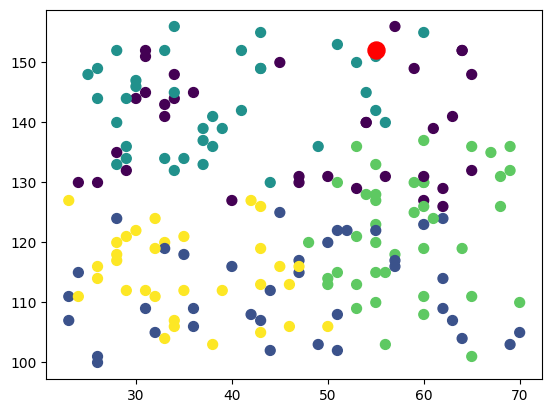

La predicción es: [2]


In [ ]:
np.random.seed(42) #Vamos a tomar las mismas semillas

#1. Construimos el modelo K-Means
k=5 #Cinco montoncitos de datos
mkm=KMeans(n_clusters=k, init='random',random_state=42)
mkm.fit(XD,yd)
ydp=mkm.predict(XD)

#2. Evaluamos el modelo K-Means
cm=confusion_matrix(yd,ydp)
print('La matriz de confusión es:\n:',cm)
VN=cm[0,0];FP=cm[0,1]
FN=cm[1,0];VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)

print('Exactitud:',Exactitud)
print('Sensibilidad:',Sensibilidad)
print('Especificidad:',Especificidad)
print('Precision:',Precision)
labels=mkm.labels_
centroids=mkm.cluster_centers_
print('Los centroides son los siguientes:\n',centroids)

plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=mkm.labels_,s=50,cmap='viridis') #Esta gráfica me permite agrupar los datos por colores
plt.scatter(XDp[:,0],XDp[:,1],marker='o',s=150,facecolors='red') #Esta gráfica me indica donde esta el paciente o la pacienta
plt.show()

ydpkn=mkm.predict(XDp)
print('La predicción es:',ydpkn)

##**Análisis de resultados.**

#####La persona evaluada ha caído en el Cluster **2** tiene un perfil de riesgo elevado para desarrollar una enfermedad cardíaca **[45.68, 112.08, 110.08, 28.46]**, con un **71%** de probabilidad de desarrollar la enfermedad basado en las características promedio de este cluster. Los valores promedio en las características del Cluster 2 indican un riesgo significativo, pero también hay una posibilidad del **30%** de no desarrollar la enfermedad. Esto sugiere que el perfil del Cluster 2 está asociado con un riesgo alto, y las características de este grupo reflejan un alto riesgo de enfermedad cardíaca.

#####La exactitud del modelo es del **52.1%**, lo que significa que clasifica correctamente el **52.1%** de los casos. La sensibilidad es del **53.1%**, lo que indica que el modelo detecta correctamente el **53.1%** de los casos positivos en promedio. La especificidad es del **50%**, lo que sugiere que el modelo identifica correctamente el **50%** de los casos negativos. La precisión es del **70.3%**, lo que quiere decir que, cuando el modelo predice una clase, el **70.3%** de las predicciones son correctas. La matriz de confusión muestra que el modelo tiene problemas para clasificar correctamente algunos casos, con muchas entradas en la matriz siendo cero. Esto, junto con la exactitud relativamente baja, sugiere que el modelo podría necesitar ajustes o mejoras para manejar mejor la clasificación en este conjunto de datos.

##**2. Se procede con la caracterización de cada cluster.**

####* Número de Personas del cluster
####* Número de Personas que desarrollarán una enfermedad por cluster
####* Número de Personas que NO desarrollarán una enfermedad por cluster

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels) #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('Los conteos son:\n',counts_1)

c01=len(np.where((labels==0) & (yd==1))[0]) #Digame cuantos desarrollarán una enfermedad cardiaca del primer cluster
c00=len(np.where((labels==0) & (yd==0))[0]) #Digame cuantos NO desarrollarán una enfermedad cardiaca del primer cluster
print('Las personas del primer cluster que desarrollarán una enfermedad cardiaca son:',c01/(c00+c01))
print('Las personas del primer cluster que NO desarrollarán una enfermedad cardiaca son:',c00/(c00+c01))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del primer cluster que desarrollarán una enfermedad cardiaca son: 0.6764705882352942
Las personas del primer cluster que NO desarrollarán una enfermedad cardiaca son: 0.3235294117647059


#### Las personas del **primer** cluster que desarrollarán una enfermedad cardiaca son el **(68%)** y las que **NO** que desarrollarán una enfermedad cardiaca son el **(33%).**

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels) #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('Los conteos son:\n',counts_1)

c11=len(np.where((labels==1) & (yd==1))[0]) #Digame cuantos desarrollarán una enfermedad cardiaca del segundo cluster
c10=len(np.where((labels==1) & (yd==0))[0]) #Digame cuantos NO desarrollarán una enfermedad cardiaca del segundo cluster
print('Las personas del segundo cluster que desarrollarán una enfermedad cardiaca son:',c11/(c10+c11))
print('Las personas del segundo cluster que NO desarrollarán una enfermedad cardiaca son:',c10/(c10+c11))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del segundo cluster que desarrollarán una enfermedad cardiaca son: 0.7027027027027027
Las personas del segundo cluster que NO desarrollarán una enfermedad cardiaca son: 0.2972972972972973


#### Las personas del **segundo** cluster que desarrollarán una enfermedad cardiaca son el **(71%)** y las que **NO** que desarrollarán una enfermedad cardiaca son el **(30%).**

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels) #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('Los conteos son:\n',counts_1)

c21=len(np.where((labels==2) & (yd==1))[0]) #Digame cuantos desarrollarán una enfermedad cardiaca del tercer cluster
c20=len(np.where((labels==2) & (yd==0))[0]) #Digame cuantos NO desarrollarán una enfermedad cardiaca del tercer cluster
print('Las personas del tercer cluster que desarrollarán una enfermedad cardiaca son:',c21/(c20+c21))
print('Las personas del tercer cluster que NO desarrollarán una enfermedad cardiaca son:',c20/(c20+c21))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del tercer cluster que desarrollarán una enfermedad cardiaca son: 0.32432432432432434
Las personas del tercer cluster que NO desarrollarán una enfermedad cardiaca son: 0.6756756756756757


#### Las personas del **tercer** cluster que desarrollarán una enfermedad cardiaca son el **(33%)** y las que **NO** que desarrollarán una enfermedad cardiaca son el **(68%).**

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels) #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('Los conteos son:\n',counts_1)

c31=len(np.where((labels==3) & (yd==1))[0]) #Digame cuantos desarrollarán una enfermedad cardiaca del cuarto cluster
c30=len(np.where((labels==3) & (yd==0))[0]) #Digame cuantos NO desarrollarán una enfermedad cardiaca del cuarto cluster
print('Las personas del cuarto cluster que desarrollarán una enfermedad cardiaca son:',c31/(c30+c31))
print('Las personas del cuarto cluster que NO desarrollarán una enfermedad cardiaca son:',c30/(c30+c31))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del cuarto cluster que desarrollarán una enfermedad cardiaca son: 0.775
Las personas del cuarto cluster que NO desarrollarán una enfermedad cardiaca son: 0.225


#### Las personas del **cuarto** cluster que desarrollarán una enfermedad cardiaca son el **(78%)** y las que **NO** que desarrollarán una enfermedad cardiaca son el **(23%).**

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels) #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('Los conteos son:\n',counts_1)

c41=len(np.where((labels==4) & (yd==1))[0]) #Digame cuantos desarrollarán una enfermedad cardiaca del quinto cluster
c40=len(np.where((labels==4) & (yd==0))[0]) #Digame cuantos NO desarrollarán una enfermedad cardiaca del quinto cluster
print('Las personas del quinto cluster que desarrollarán una enfermedad cardiaca son:',c41/(c40+c41))
print('Las personas del quinto cluster que NO desarrollarán una enfermedad cardiaca son:',c40/(c40+c41))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
Los conteos son:
 [34 37 37 40 32]
Las personas del quinto cluster que desarrollarán una enfermedad cardiaca son: 0.46875
Las personas del quinto cluster que NO desarrollarán una enfermedad cardiaca son: 0.53125


#### Las personas del **quinto** cluster que desarrollarán una enfermedad cardiaca son el **(47%)** y las que **NO** que desarrollarán una enfermedad cardiaca son el **(54%).**

##**Análisis de resultados.**

#####En resumen, el **Cuarto** Cluster es el de mayor riesgo **(78%)** para desarrollar enfermedad cardíaca, mientras que el **Tercer** Cluster tiene el riesgo más bajo **(33%)**. Los Clusters **Segundo** **(71%)** y **Primer** **(68%)** también presentan riesgos altos, mientras que el **Quinto** Cluster **(47%)** muestra un riesgo intermedio.

#####**- Cluster con mayor edad:** Cuarto Cluster (58.48 años).
#####**- Cluster con mayor presión sistólica:** Primer Cluster (139.15).
#####**- Cluster con menor presión diastólica:** Quinto Cluster (77.13).
#####**- Cluster con menor índice de masa corporal:** Quinto Cluster (27.91).